In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import metrics 

In [2]:
data = pd.read_csv(r'application_train.csv')

feature_importance =['TARGET','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE',
                'AMT_ANNUITY','AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','AMT_CREDIT','HOUR_APPR_PROCESS_START',
                'AMT_GOODS_PRICE','ORGANIZATION_TYPE','OWN_CAR_AGE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE',
                'NAME_FAMILY_STATUS','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS',
                'NAME_TYPE_SUITE','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','CNT_CHILDREN',
                'DEF_30_CNT_SOCIAL_CIRCLE','FLAG_OWN_REALTY','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_WORK_PHONE',
                'FLAG_PHONE','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REGION_RATING_CLIENT','CODE_GENDER',
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_EMAIL','FLAG_DOCUMENT_3','FLAG_OWN_CAR',
                'FLAG_DOCUMENT_8','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','NAME_CONTRACT_TYPE',
                'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_18','FLAG_DOCUMENT_16'] 

df = pd.DataFrame(data, columns = feature_importance)
df.head()

,TARGET,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_CREDIT,...,FLAG_OWN_CAR,FLAG_DOCUMENT_8,LIVE_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,NAME_CONTRACT_TYPE,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_18,FLAG_DOCUMENT_16
0,1,-9461,-3648.0,-2120,-637,-1134.0,24700.5,202500.0,0.018801,406597.5,...,N,0,0,0,0,Cash loans,0,0,0,0
1,0,-16765,-1186.0,-291,-1188,-828.0,35698.5,270000.0,0.003541,1293502.5,...,N,0,0,0,0,Cash loans,0,0,0,0
2,0,-19046,-4260.0,-2531,-225,-815.0,6750.0,67500.0,0.010032,135000.0,...,Y,0,0,0,0,Revolving loans,0,0,0,0
3,0,-19005,-9833.0,-2437,-3039,-617.0,29686.5,135000.0,0.008019,312682.5,...,N,0,0,0,0,Cash loans,0,0,0,0
4,0,-19932,-4311.0,-3458,-3038,-1106.0,21865.5,121500.0,0.028663,513000.0,...,N,1,0,0,0,Cash loans,0,0,0,0


In [3]:
X = df[feature_importance]
X = df.drop(['TARGET'], axis=1)
Y = df.TARGET

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                         
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])


X.shape

(307511, 47)

In [4]:
#Splitting Data 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

#Replacing NaNs with means of their column

X_test.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())

X_train.fillna(X_train.mean(), inplace=True)
X_train = X_train.fillna(X_train.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
lr_list = [10e-6, 10e-3, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.10, 1.5, 2, 2.5, 10]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=learning_rate, random_state=10)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ", (gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): ",(gb_clf.score(X_test, y_test)))

Learning rate:  1e-05
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.01
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.01
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.05
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.075
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.1
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.9187243913543044
Learning rate:  0.25
Accuracy score (training):  0.9195055213070887
Accuracy score (validation):  0.918735230992694
Learning rate:  0.5
Accuracy score (training):  0.9195380405747549
Accuracy score (validation):  0.9186810328007458
Learning rate:  0.75
Accuracy score (training):  0.91952874935542

In [19]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=100)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[84756     0]
 [ 7498     0]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84756
           1       0.00      0.00      0.00      7498

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.84      0.92      0.88     92254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


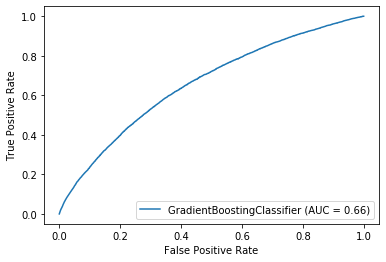

In [20]:
metrics.plot_roc_curve(gb_clf2,X_test,y_test)